In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"

online_rt = pd.read_csv(path, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


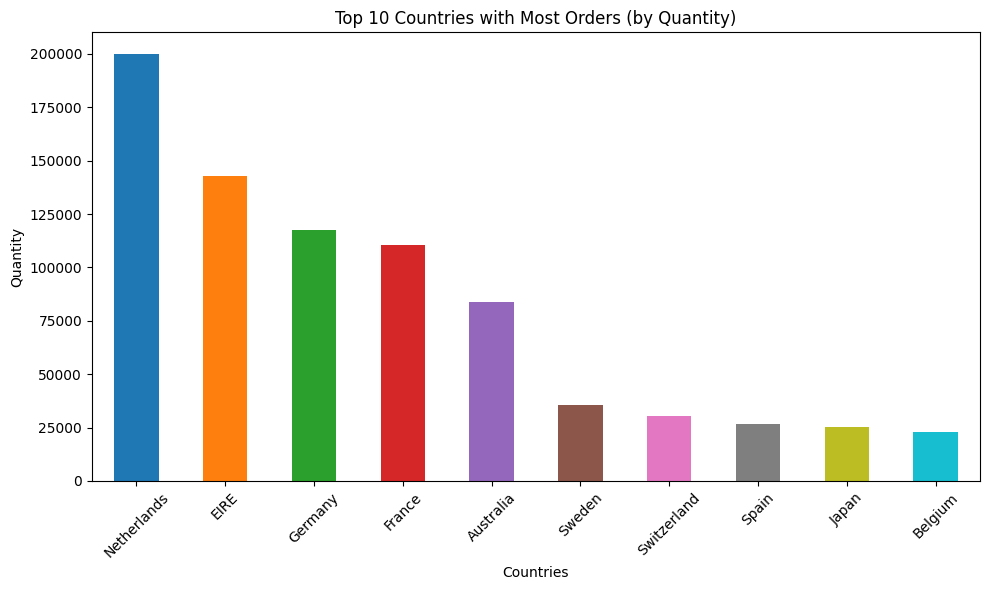

In [0]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
#groupby id 
customer= online_rt.groupby(['CustomerID','Country']).sum()
#there is an outlier with negative price
customer=customer[customer.UnitPrice>0]
#get the value of the index and put in the column country
customer['country']=customer.index.get_level_values(1)
#top there countries
top_countries=['Netherlands','EIRE','Germany']
#filter the dataframe to just select ones in the to_counteries
customer=customer[customer['country'].isin(top_countries) ]
#################

/home/spark-981e6443-a116-425d-9a4a-de/.ipykernel/2870/command-8662550898000871-2780593070:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer= online_rt.groupby(['CustomerID','Country']).sum()
